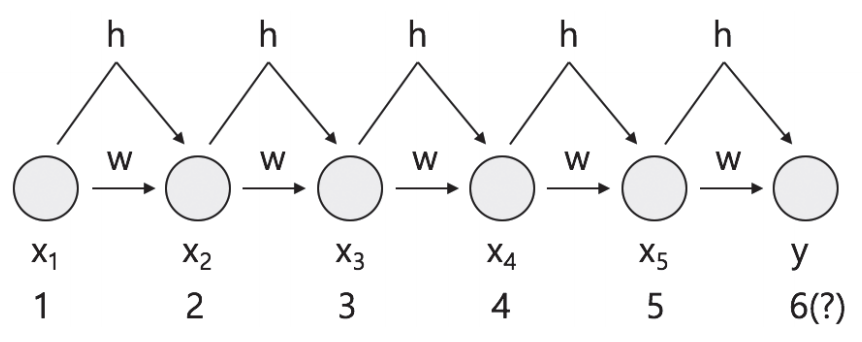

In [ ]:
# RNN의 1회 연산
Image('/content/drive/My Drive/Prediction of Time Series Walking in Deep Learning/pic/ch06_01.png', width=500)

## SimpleRNN

In [ ]:
# 1. 데이터
import numpy as np
x_train = np.array([[1,2,3,4,5], [2,3,4,5,6], [3,4,5,6,7]])
y_train = np.array([6,7,8])
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)

print("x_train.shape : ", x_train.shape) #(3, 5, 1)
print("y_train.shape : ", y_train.shape) #(3, )

# 2. 모델 구성
# shape = (행, 열, 피처) = (행, 열, feature) = (샘플수, 타임스텝, 피처) = ...
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
model = Sequential()
model.add(SimpleRNN(7, input_shape = (5, 1), activation ='relu'))
model.add(Dense(4))
model.add(Dense(1))
model.summary()

# 3. 훈련
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
model.fit(x_train, y_train, epochs=100, batch_size=1, verbose=0)

# 4. 예측
x_predict = np.array([[4,5,6,7,8]])
print(x_predict.shape) #(1, 5)

x_predict = x_predict.reshape(x_predict.shape[0], x_predict.shape[1], 1)
print("x_predict.shape : ", x_predict.shape) # (1, 5, 1)

y_predict = model.predict(x_predict)
print("예측값 : ", y_predict)

x_train.shape :  (3, 5, 1)
y_train.shape :  (3,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 7)                 63        
_________________________________________________________________
dense (Dense)                (None, 4)                 32        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 100
Trainable params: 100
Non-trainable params: 0
_________________________________________________________________
(1, 5)
x_predict.shape :  (1, 5, 1)
예측값 :  [[7.4273496]]


## LSTM
- SimpleRNN의 발전형태, 성능 ↑/ 속도 ↓

In [ ]:
# 1. 데이터
import numpy as np
x_train = np.array([[1,2,3,4,5], [2,3,4,5,6], [3,4,5,6,7]])
y_train = np.array([6,7,8])
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)

print("x_train.shape : ", x_train.shape) #(3, 5, 1)
print("y_train.shape : ", y_train.shape) #(3, )

# 2. 모델 구성
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(7, input_shape = (5, 1), activation ='relu'))
model.add(Dense(4))
model.add(Dense(1))
model.summary()

# 3. 훈련
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
model.fit(x_train, y_train, epochs=100, batch_size=1, verbose=0)

# 4. 평가, 예측
x_predict = np.array([[4,5,6,7,8]])
print(x_predict.shape) #(1, 5)

x_predict = x_predict.reshape(x_predict.shape[0], x_predict.shape[1], 1)
print("x_predict.shape : ", x_predict.shape) # (1, 5, 1)

y_predict = model.predict(x_predict)
print("예측값 : ", y_predict)

x_train.shape :  (3, 5, 1)
y_train.shape :  (3,)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 7)                 252       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 32        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________
(1, 5)
x_predict.shape :  (1, 5, 1)
예측값 :  [[9.794367]]


## GRU
- LSTM보다 약간 빠르고, 성능은 거의 비슷하거나 약간 낮음

In [ ]:
# 1. 데이터
import numpy as np
x_train = np.array([[1,2,3,4,5], [2,3,4,5,6], [3,4,5,6,7]])
y_train = np.array([6,7,8])
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)

print("x_train.shape : ", x_train.shape) #(3, 5, 1)
print("y_train.shape : ", y_train.shape) #(3, )

# 2. 모델 구성
from keras.models import Sequential
from keras.layers import Dense, GRU
model = Sequential()
model.add(GRU(7, input_shape = (5, 1), activation ='relu'))
model.add(Dense(4))
model.add(Dense(1))
model.summary()

# 3. 훈련
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
model.fit(x_train, y_train, epochs=100, batch_size=1, verbose=0)

# 4. 평가, 예측
x_predict = np.array([[4,5,6,7,8]])
print(x_predict.shape) #(1, 5)

x_predict = x_predict.reshape(x_predict.shape[0], x_predict.shape[1], 1)
print("x_predict.shape : ", x_predict.shape) # (1, 5, 1)

y_predict = model.predict(x_predict)
print("예측값 : ", y_predict)

x_train.shape :  (3, 5, 1)
y_train.shape :  (3,)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 7)                 210       
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 32        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 247
Trainable params: 247
Non-trainable params: 0
_________________________________________________________________
(1, 5)
x_predict.shape :  (1, 5, 1)
예측값 :  [[9.401268]]


## Bidirectional
- 우선 RNN으로 진행한 후 역으로 다시 훈련시키는 방법

In [ ]:
# 1. 데이터
import numpy as np
x_train = np.array([[1,2,3,4,5], [2,3,4,5,6], [3,4,5,6,7]])
y_train = np.array([6,7,8])
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)

print("x_train.shape : ", x_train.shape) #(3, 5, 1)
print("y_train.shape : ", y_train.shape) #(3, )

# 2. 모델 구성
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional
model = Sequential()
model.add(Bidirectional(LSTM(7, activation ='relu'), input_shape=(5, 1)))
model.add(Dense(4))
model.add(Dense(1))
model.summary()

# 3. 훈련
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
model.fit(x_train, y_train, epochs=100, batch_size=1, verbose=0)

# 4. 평가, 예측
x_predict = np.array([[4,5,6,7,8]])
print(x_predict.shape) #(1, 5)

x_predict = x_predict.reshape(x_predict.shape[0], x_predict.shape[1], 1)
print("x_predict.shape : ", x_predict.shape) # (1, 5, 1)

y_predict = model.predict(x_predict)
print("예측값 : ", y_predict)

x_train.shape :  (3, 5, 1)
y_train.shape :  (3,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 14)                504       
_________________________________________________________________
dense (Dense)                (None, 4)                 60        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 569
Trainable params: 569
Non-trainable params: 0
_________________________________________________________________
(1, 5)
x_predict.shape :  (1, 5, 1)
예측값 :  [[9.090419]]


## LSTM 레이어 연결

In [ ]:
# 1. 데이터
import numpy as np
x_train = np.array([[1,2,3,4,5], [2,3,4,5,6], [3,4,5,6,7]])
y_train = np.array([6,7,8])
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)

print("x_train.shape : ", x_train.shape) #(3, 5, 1)
print("y_train.shape : ", y_train.shape) #(3, )

# 2. 모델 구성
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(7, input_shape = (5, 1), activation ='relu', return_sequences=True ))
model.add(LSTM(8)) # 추가
model.add(Dense(4))
model.add(Dense(1))
model.summary()

# 3. 훈련
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
model.fit(x_train, y_train, epochs=100, batch_size=1, verbose=0)

# 4. 평가, 예측
x_predict = np.array([[4,5,6,7,8]])
print(x_predict.shape) #(1, 5)

x_predict = x_predict.reshape(x_predict.shape[0], x_predict.shape[1], 1)
print("x_predict.shape : ", x_predict.shape) # (1, 5, 1)

y_predict = model.predict(x_predict)
print("예측값 : ", y_predict)

x_train.shape :  (3, 5, 1)
y_train.shape :  (3,)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 5, 7)              252       
_________________________________________________________________
lstm_2 (LSTM)                (None, 8)                 512       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 805
Trainable params: 805
Non-trainable params: 0
_________________________________________________________________
(1, 5)
x_predict.shape :  (1, 5, 1)
예측값 :  [[7.935679]]
